# 1. Import Libraries

In [6]:
# Python library for pulling data out of HTML and XML files.
from bs4 import BeautifulSoup

# HTTP library for making requests to web pages.
import requests

# Module for working with HTML entities. It provides functions for escaping and unescaping HTML entities.
import html 

#  Regular expression module in Python.
import re

# Python Imaging Library (PIL), or its successor Pillow, is used for working with images in Python.
from PIL import Image

# Render and display objects in jupyter notebook. 
from IPython.display import display

# Module for interacting with the operating system and working with files, directories, and other operating system-related tasks.
import os

# 2. Get the page content

In [2]:
# Get the URL
url = 'https://apod.nasa.gov/apod/calendar/ca2301.html'

# Get User agent for your computer at https://httpbin.org/get
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

In [3]:
page = requests.get(url, headers=headers)

soup = BeautifulSoup(page.content, "html.parser")

# print(soup)

# 3. Use Regex to get the image url

In [4]:
# Use regex to find 'src' attribute values of 'img' tags
img_src_pattern = re.compile(r'<img[^>]*src="([^"]+)"[^>]*>')

# Find all 'td' tags containing 'img' tags
td_tags = soup.find_all('td')

# Extract 'src' attribute values using regex
image_urls = []

for td in td_tags:
    match = img_src_pattern.search(str(td))
    if match:
        image_urls.append(match.group(1))
        
# Print the list of image URLs
print(image_urls)

['S_230101.jpg', 'S_230102.jpg', 'S_230103.jpg', 'S_230104.jpg', 'S_230105.jpg', 'S_230106.jpg', 'S_230107.jpg', 'S_230108.jpg', 'S_230109.jpg', 'S_230110.jpg', 'S_230111.jpg', 'S_230112.jpg', 'S_230113.jpg', 'S_230114.jpg', 'S_230115.jpg', 'S_230116.jpg', 'S_230117.jpg', 'S_230118.jpg', 'S_230119.jpg', 'S_230120.jpg', 'S_230121.jpg', 'S_230122.jpg', 'S_230123.jpg', 'S_230124.jpg', 'S_230125.jpg', 'S_230126.jpg', 'S_230127.jpg', 'S_230128.jpg', 'S_230129.jpg', 'S_230130.jpg', 'S_230131.jpg']


# 4. Get the image url and download the file

In [9]:
# Use regex to find 'src' attribute values of 'img' tags
img_src_pattern = re.compile(r'<img[^>]*src="([^"]+)"[^>]*>')

# Find all 'td' tags containing 'img' tags
td_tags = soup.find_all('td')

# Create a directory to save the images
os.makedirs('apod_images', exist_ok=True)

# Download and save each image
image_paths = []
for td in td_tags:
    match = img_src_pattern.search(str(td))
    if match:
        img_url = match.group(1)
        img_name = img_url.split('/')[-1]  # Get the image name from the URL
        img_path = os.path.join('apod_images', img_name)

        # Download the image
        img_data = requests.get('https://apod.nasa.gov/apod/calendar/'+img_url).content

        # Save the image to a file
        with open(img_path, 'wb') as img_file:
            img_file.write(img_data)

        image_paths.append(img_path)
        

        print(f"Image saved: {img_path}")

Image saved: apod_images\S_230101.jpg
Image saved: apod_images\S_230102.jpg
Image saved: apod_images\S_230103.jpg
Image saved: apod_images\S_230104.jpg
Image saved: apod_images\S_230105.jpg
Image saved: apod_images\S_230106.jpg
Image saved: apod_images\S_230107.jpg
Image saved: apod_images\S_230108.jpg
Image saved: apod_images\S_230109.jpg
Image saved: apod_images\S_230110.jpg
Image saved: apod_images\S_230111.jpg
Image saved: apod_images\S_230112.jpg
Image saved: apod_images\S_230113.jpg
Image saved: apod_images\S_230114.jpg
Image saved: apod_images\S_230115.jpg
Image saved: apod_images\S_230116.jpg
Image saved: apod_images\S_230117.jpg
Image saved: apod_images\S_230118.jpg
Image saved: apod_images\S_230119.jpg
Image saved: apod_images\S_230120.jpg
Image saved: apod_images\S_230121.jpg
Image saved: apod_images\S_230122.jpg
Image saved: apod_images\S_230123.jpg
Image saved: apod_images\S_230124.jpg
Image saved: apod_images\S_230125.jpg
Image saved: apod_images\S_230126.jpg
Image saved:

# 5. Create a collage with the images

In [10]:
# Calculate the dimensions for a rectangular collage
num_images = len(image_paths)
num_columns = 4  # You can adjust the number of columns as needed
num_rows = -(-num_images // num_columns)  # Ceiling division to get the minimum number of rows

# Calculate the size of each cell in the collage
cell_width = max(Image.open(img_path).width for img_path in image_paths)
cell_height = max(Image.open(img_path).height for img_path in image_paths)

# Calculate the dimensions of the collage
collage_width = num_columns * cell_width
collage_height = num_rows * cell_height

# Create a rectangular collage
collage = Image.new('RGB', (collage_width, collage_height))

# Paste images into the collage
x_offset = 0
y_offset = 0

for img_path in image_paths:
    img = Image.open(img_path)
    img = img.resize((cell_width, cell_height), Image.LANCZOS)  # Resize the image to fit within the cell
    collage.paste(img, (x_offset, y_offset))
    x_offset += cell_width
    if x_offset >= collage_width:
        x_offset = 0
        y_offset += cell_height

# Save the rectangular collage
collage.save('apod_rectangular_collage.jpg')

print("Rectangular Collage created and saved as apod_rectangular_collage.jpg")


Rectangular Collage created and saved as apod_rectangular_collage.jpg


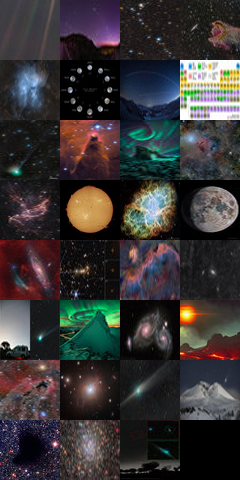

In [11]:
# Display the collage in the Jupyter Notebook
display(collage)